[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Instance Segmentation, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Aug 27 16:03:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A4500               Off |   00000000:01:00.0  On |                  Off |
| 30%   36C    P8             27W /  200W |    2685MiB /  20470MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/nakahira/workspace/seavis2024/seavis0828


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [1]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA RTX A4500, 20047MiB)
Setup complete ✅ (20 CPUs, 62.6 GB RAM, 204.4/915.3 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/home/nakahira/workspace/seavis2024/seavis0828
100%|██████████████████████████████████████| 22.8M/22.8M [00:01<00:00, 23.2MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA RTX A4500, 20047MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100%|█████████████████████████████████████████| 104k/104k [00:00<00:00, 511kB/s]
image 1/1 /home/nakahira/workspace/seavis2024/seavis0828/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 85.9ms
Speed: 1.5ms preprocess, 85.9ms inference, 54.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="WkuTvUIPSZOmD5IxWpum")
project = rf.workspace("nakahira").project("sanngo2")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sanngo2-1 in yolov8:: 100%|█| 132/132 [00:00<0


In [5]:
dataset.location

'/home/nakahira/workspace/seavis2024/seavis0828/sanngo2-1'

## Custom Training

In [11]:
from ultralytics import YOLO
model = YOLO('yolov8s-seg.pt')
results = model.train(data="/home/nakahira/workspace/seavis2024/seavis0828/sanngo2-1/data.yaml", batch=4, epochs=300, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.82 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA RTX A4500, 20047MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/home/nakahira/workspace/seavis2024/seavis0828/sanngo2-1/data.yaml, epochs=300, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_w

In [12]:
!ls {HOME}/runs/segment/train2/
# !ls /home/nakahira/workspace/seavis2024/seavis0826/runs/segment/train5

args.yaml			 MaskP_curve.png      train_batch4642.jpg
BoxF1_curve.png			 MaskPR_curve.png     val_batch0_labels.jpg
BoxP_curve.png			 MaskR_curve.png      val_batch0_pred.jpg
BoxPR_curve.png			 results.csv	      val_batch1_labels.jpg
BoxR_curve.png			 results.png	      val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch0.jpg     val_batch2_labels.jpg
confusion_matrix.png		 train_batch1.jpg     val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2.jpg     weights
labels.jpg			 train_batch4640.jpg
MaskF1_curve.png		 train_batch4641.jpg


/home/nakahira/workspace/seavis2024/seavis0828


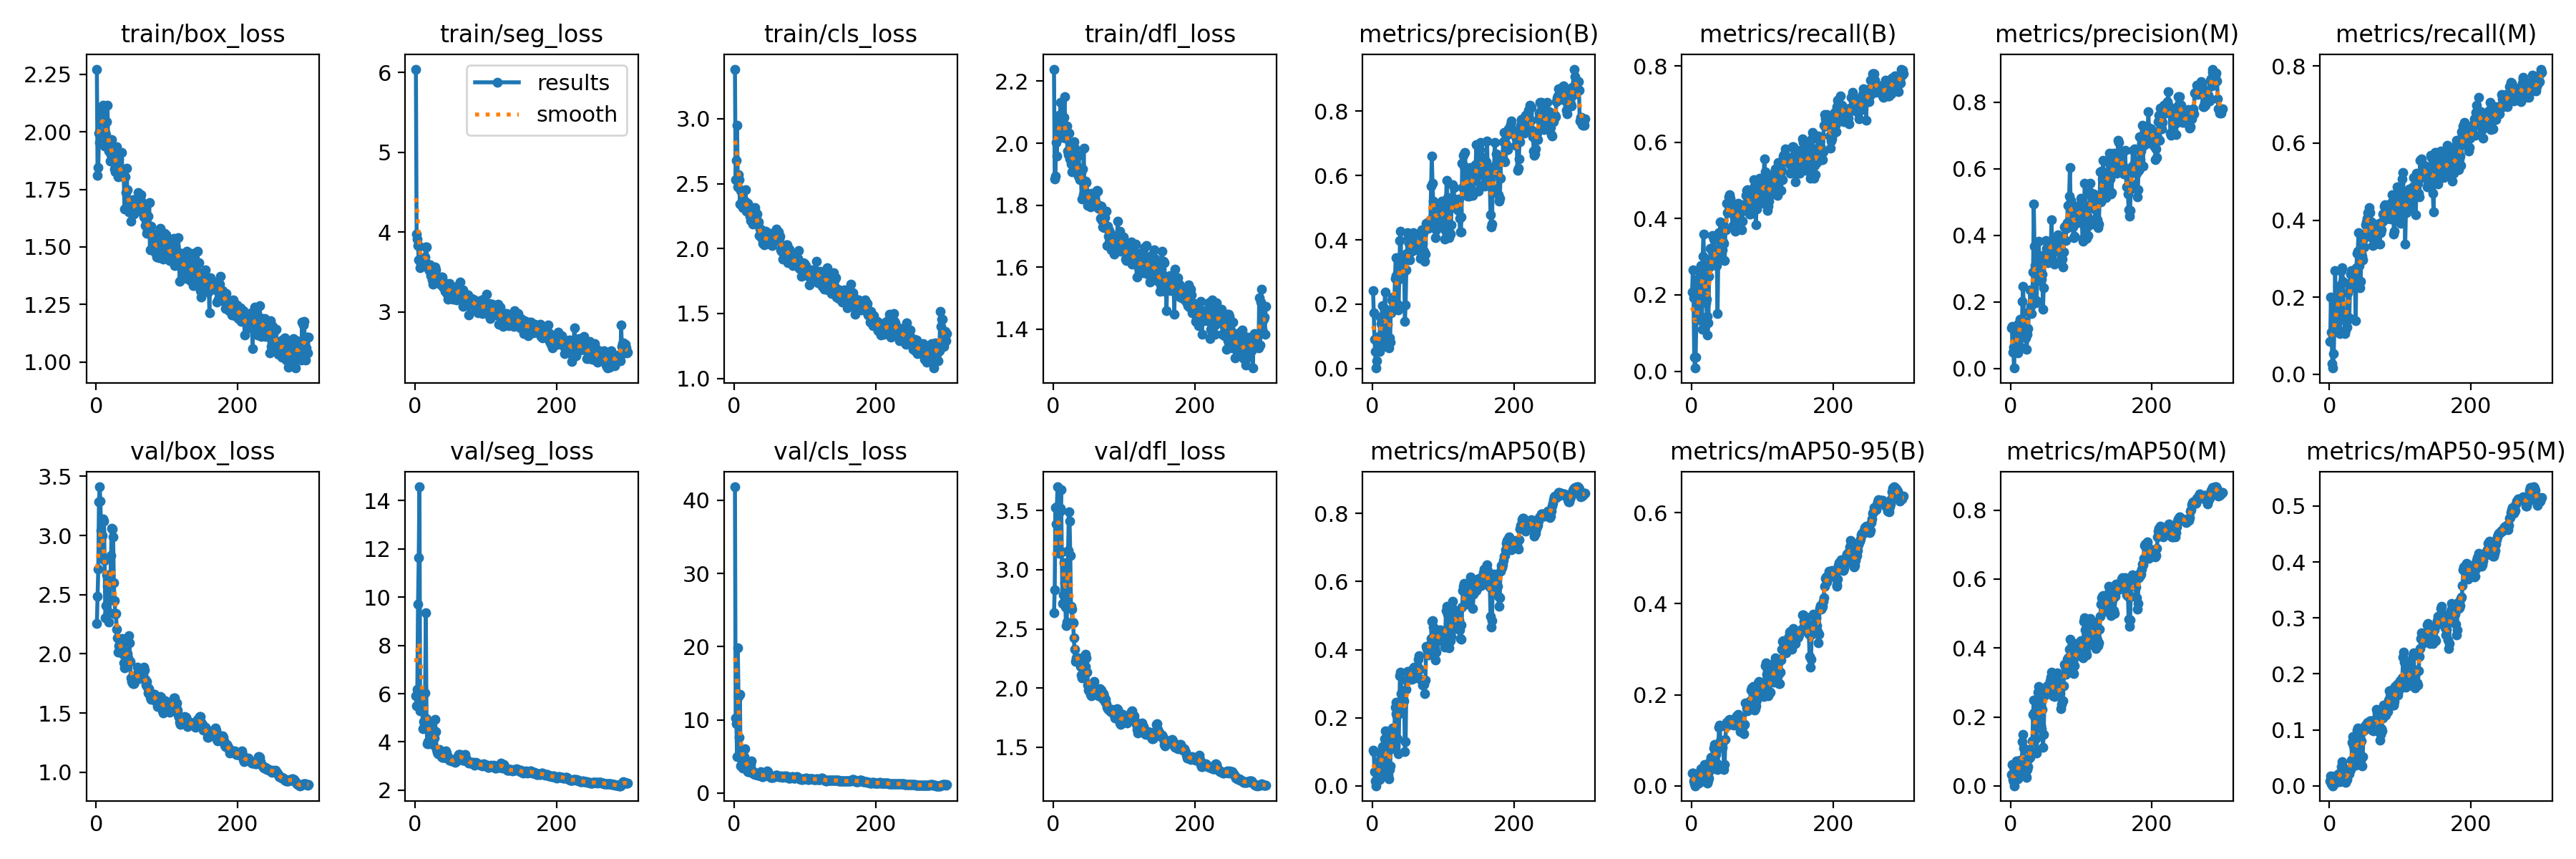

In [13]:
%cd {HOME}
#Image(filename=f'{HOME}/runs/segment/train8/confusion_matrix.png', width=600)
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

In [1]:
!nvidia-smi

Tue Aug 20 18:03:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A4500               Off |   00000000:01:00.0  On |                  Off |
| 30%   36C    P8             20W /  200W |     471MiB /  20470MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [32]:
#sango cover_area count(picture) 
import cv2
import numpy as np
from PIL import Image

model_file = '/home/nakahira/workspace/Nishida/sango/seavis0828/runs/segment/train2/weights/best.pt'
model = YOLO(model_file)

img_path = '/home/nakahira/workspace/Nishida/sango/seavis0827/sanngo2-1/test/images/03_png.rf.dd07f6cb8b1438fb1a5a1ac8b2bfa55f.jpg'
image = cv2.imread(img_path)
results = model(image)

img = Image.open(img_path)
width, height = img.size
area = width * height
# print(f'Width:{width}, Height:{height}')
# print(f'Area:{area}pixel')

object_count = 0
sum_pixel = 0
for result in results:
    if hasattr (result,'masks') and result.masks is not None:
        for mask in result.masks.data:
            pixel_count = np.sum(mask.cpu().numpy())
            sum_pixel += pixel_count
            #object_count += 1
            #print(f'Object:{object_count}, {pixel_count}pixels')

#print(f'Sum_pixel:{sum_pixel}pixels')
cover_area = (sum_pixel / area) * 100
print(f'Cover_area:{cover_area:.2f}%')


0: 640x640 78 edas, 4.0ms
Speed: 1.4ms preprocess, 4.0ms inference, 11.7ms postprocess per image at shape (1, 3, 640, 640)


Cover_area:38.34%


In [10]:
#sango cover_area count(Video) 
import cv2
import numpy as np

#model_file = '/home/nakahira/workspace/Nishida/sango/seavis0828/runs/segment/train2/weights/best.pt'
model_file = '/home/nakahira/workspace/nakahira/real_coral_fish_train_yolov8/runs/detect/train3/weights/best.pt'
model = YOLO(model_file)

video_path = '/home/nakahira/workspace/nakahira/real_white_coral_train_yolov8/sesoko_eda_short.MP4'
cap = cv2.VideoCapture(video_path)

#video_file name change!
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/home/nakahira/workspace/Nishida/sango/seavis0828/runs/predict/output_video2.mp4', fourcc, 30.0, (int(cap.get(3)),int(cap.get(4))))

cover_areas = []
frame_numbers = []

frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_number += 1

    results = model(frame)

    frame_area = frame.shape[0] * frame.shape[1]
    
    sum_pixel = 0
    object_count = 0
    
    combiend_mask = np.zeros((frame.shape[0], frame.shape[1]), dtype = np.uint8)
    
    for result in results:
        if hasattr (result,'masks') and result.masks is not None:
            for mask in result.masks.data:
                mask = cv2.resize(mask.cpu().numpy(), (frame.shape[1],frame.shape[0]))
                combiend_mask = np.maximum(combiend_mask, mask)
                
                pixel_count = np.sum(mask)
                sum_pixel += pixel_count
                object_count += 1

                overlay = frame.copy()
                overlay[mask == 1] = [0,0,255]
                alpha = 0.3
                frame = cv2.addWeighted(overlay, alpha, frame, 1-alpha, 0)
                
                # object_name = results.label
                # cv2.putText(frame, f'{object_name}:Cover Area {}', (10, 30*), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
                # cover_area = (pixel_count / frame_area) * 100

                
                #cv2.putText(frame, f'Pixels:{pixel_count}', (10, 50 + 30 * object_count), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    #cv2.putText(frame, f'Total objects:{object_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    sum_pixel = np.sum(combiend_mask)
    
    cover_area = (sum_pixel / frame_area) * 100
    cover_areas.append(cover_area)
    frame_numbers.append(frame_number)
    cv2.putText(frame, f'Cover Area:{cover_area:.2f}%', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    out.write(frame)


cap.release()
out.release()
cv2.destroyAllWindows()

average_cover_area = np.mean(cover_areas)
print(f'Average_cover_area:{average_cover_area:.2f}%')


0: 384x640 (no detections), 2.2ms
Speed: 0.8ms preprocess, 2.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2.1ms
Speed: 0.9ms preprocess, 2.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2.2ms
Speed: 0.9ms preprocess, 2.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2.4ms
Speed: 0.9ms preprocess, 2.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2.4ms
Speed: 0.9ms preprocess, 2.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2.2ms
Speed: 0.9ms preprocess, 2.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2.1ms
Speed: 0.8ms preprocess, 2.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2.2ms
Speed: 0.9ms preprocess, 2.2ms inference, 0.5ms 

KeyboardInterrupt: 

In [2]:
#plot Corver Area(%) vs Frame Number
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(frame_numbers, cover_areas, label = 'Cover Area(%)')
plt.axhline(y = average_cover_area, color = 'r', linestyle = '--', label = f'Average_Cover Area({average_cover_area:.2f}%)' )
plt.xlabel('Frame Number')
plt.ylabel('Cover Area(%)')
plt.title('Cover Area(%) vs Frame Number')
plt.legend()
plt.grid(True)

#graph_file name change!
plt.savefig('/home/nakahira/workspace/Nishida/sango/seavis0828/runs/plot_graph/output_graph2.png')


NameError: name 'frame_numbers' is not defined

<Figure size 1000x500 with 0 Axes>

## Validate Custom Model

In [38]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/home/nakahira/workspace/seavis2024/seavis0827
Ultralytics YOLOv8.0.196 🚀 Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA RTX A4500, 20047MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /home/nakahira/workspace/seavis2024/seavis0827/sanngo2-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         63        245      0.908      0.759      0.877      0.657      0.889      0.759      0.866      0.534
Speed: 2.0ms preprocess, 7.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val
